# Prodicción Precios de Bienes Raices

- Modelo de Entradas:
    > ida: notación para una casa
    >
    > fecha: fecha en que se vendió la casa
    >
    > dormitorios: cantidad de dormitorios
    >
    > baños: cantidad de baños
    >
    > sqft_living: home square footage
    >
    > sqft_lot: metros cuadrados del lote
    >
    > pisos: total de pisos (niveles) en la casa
    >
    > frente al mar: propiedad frente al mar

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Definimos el dataframe
# Importamos datos
house_df = pd.read_csv('./precios_hogares.csv')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<Axes: xlabel='sqft_living', ylabel='price'>

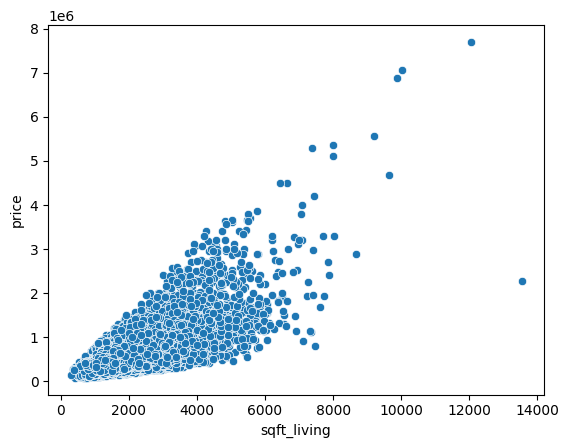

In [5]:
# Visualicemos el set de datos
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df)

<Axes: >

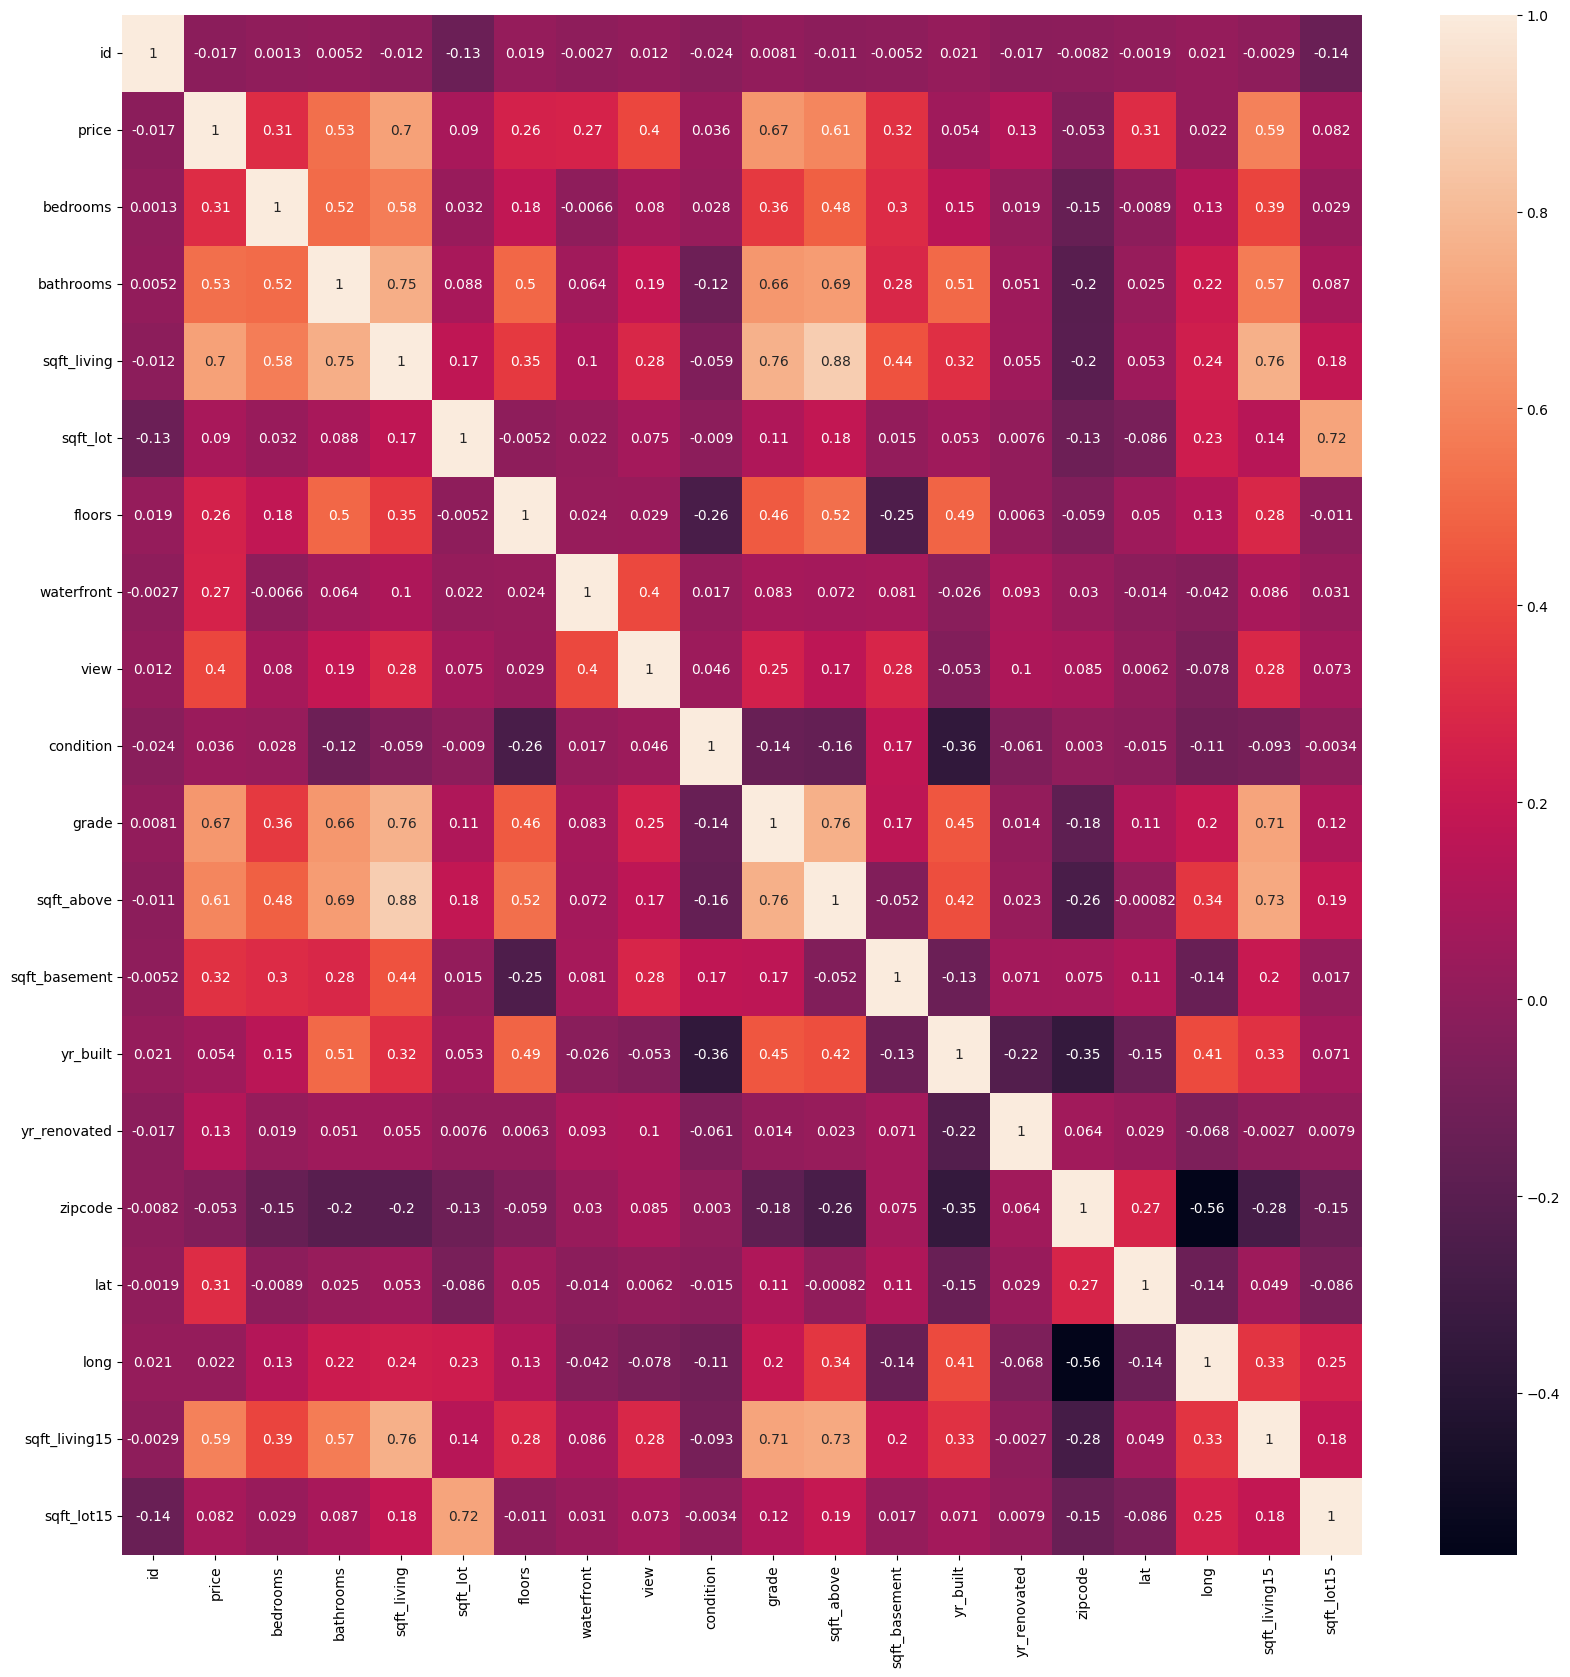

In [8]:
# Correlación
numeric_df = house_df.select_dtypes(include=[np.number])
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot = True)

In [9]:
# Limpieza de los datos
# seleccionar las caracteristicas que vamos usar para hacer la prediccón
# En este caso, usaremos los cuartos, los baños, el tamaño de la casa, el tamaño del lote
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [12]:
X = house_df[selected_features]
Y = house_df['price']

In [13]:
# Vamos a escalar los datos para normalizar la escala
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [19]:
# Normalizamos la salida Y
Y = Y.values.reshape(-1, 1)
Y_scaled = scaler.fit_transform(Y)
Y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [21]:
# Entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.25)

In [22]:
# Definimos el modelo
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.summary()

/home/zombits/MACHINE_LEARNING/PRACTICAS/my_env/lib64/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,101 (82.43 KB)

 Trainable params: 21,101 (82.43 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compilar
model.compile(optimizer='Adam', loss='mean_squared_error')

# Entrenamiento
epochs_hist = model.fit(X_train, Y_train, epochs = 100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7136e-04 - val_loss: 0.0011
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4558e-04 - val_loss: 0.0011
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.4522e-04 - val_loss: 0.0011
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9900e-04 - val_loss: 0.0011
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.5535e-04 - val_loss: 0.0012
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.1789e-04 - val_loss: 0.0013
Epoch 12/100
260/

In [25]:
# Evaluando modelo
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

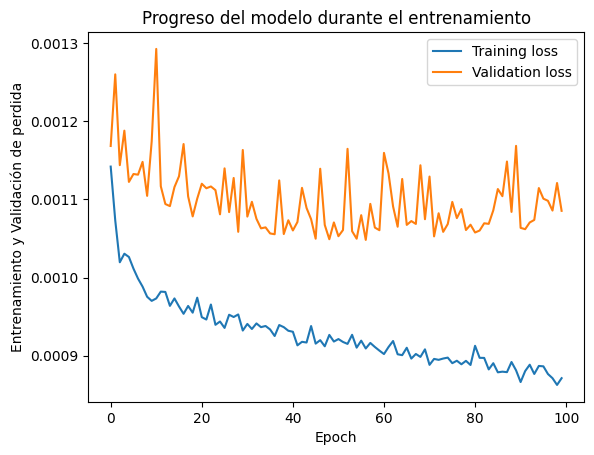

In [27]:
# Graficos
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title("Progreso del modelo durante el entrenamiento")
plt.xlabel("Epoch")
plt.ylabel("Entrenamiento y Validación de perdida")
plt.legend(["Training loss", "Validation loss"])

In [30]:
# Predicción
# Definimos una casa a predecir con sus respectivas entradas(inputs)
# 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement'

X_test_1 = np.array([[4, 3, 1960, 5000, 1, 2000, 3000]])

# Vamos a poner escalar los datos. Usaremos una escala del 0 al 1.
scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

In [32]:
# Haciendo predicción
Y_predict_1 = model.predict(X_test_scaled_1)
Y_predict_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.01520574]], dtype=float32)

In [33]:
# Revirtiendo Escalado para apreciar el precio correctamente escalado
Y_predict_1 = scaler.inverse_transform(Y_predict_1)
Y_predict_1

array([[190943.77]], dtype=float32)